In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.cluster import KMeans
from IPython.display import display, HTML
%matplotlib inline

In [2]:
df = pd.read_csv("joined.csv")

In [3]:
df

,画像,始点X,始点Y,終点X,終点Y,o有無,o地味派手,o丈,oR,oG,...,bザラ,b模様,肌R,肌G,肌B,髪R,髪G,髪B,幅比,輪郭
0,000000004.jpg,91,25,296,681,1,0,1.0,74,76,...,1,0,234,203,199,130,107,107,2.519231,b'square'
1,000000008.jpg,68,13,232,564,1,0,1.0,72,75,...,0,0,235,194,181,49,40,47,3.263158,b'square'
2,000000009.jpg,114,29,221,457,1,0,1.0,38,38,...,0,0,199,156,134,27,25,25,3.025000,b'circle'
3,000000012.jpg,229,38,375,626,1,0,0.0,174,158,...,0,4,181,130,99,66,44,26,3.562500,b'square'
4,000000013.jpg,109,28,265,577,1,0,1.0,28,26,...,0,0,224,175,146,36,30,28,3.086957,b'square'
5,000000014.jpg,79,2,165,261,1,0,1.0,21,23,...,0,0,215,166,138,34,27,22,2.674419,b'square'
6,000000015.jpg,82,21,506,857,1,0,1.0,38,52,...,0,0,228,195,186,203,173,160,2.367089,b'square'
7,000000024.jpg,358,0,519,403,1,0,1.0,201,166,...,0,0,148,100,81,28,23,19,2.566667,b'square'
8,000000025.jpg,126,23,309,564,1,0,0.3,249,248,...,0,0,210,170,141,34,29,30,1.720930,b'square'
9,000000027.jpg,131,5,367,631,0,0,1.0,255,255,...,0,0,190,132,118,68,39,41,3.806452,b'square'


In [4]:
df = df.drop("始点X", axis=1).drop("始点Y", axis=1).drop("終点X", axis=1).drop("終点Y", axis=1)

In [5]:
df = df.drop("o地味派手", axis=1).drop("i地味派手", axis=1).drop("b地味派手", axis=1).drop("o丈", axis=1).drop("i丈", axis=1).drop("b丈", axis=1)

In [6]:
df.columns

Index(['画像', 'o有無', 'oR', 'oG', 'oB', 'o目詰', 'o目粗', 'o薄', 'o厚', 'o軽', 'o重',
       'o柔', 'o堅', 'oツル', 'oザラ', 'o模様', 'iR', 'iG', 'iB', 'i目詰', 'i目粗', 'i薄',
       'i厚', 'i軽', 'i重', 'i柔', 'i堅', 'iツル', 'iザラ', 'i模様', 'bR', 'bG', 'bB',
       'b目詰', 'b目粗', 'b薄', 'b厚', 'b軽', 'b重', 'b柔', 'b堅', 'bツル', 'bザラ', 'b模様',
       '肌R', '肌G', '肌B', '髪R', '髪G', '髪B', '幅比', '輪郭'],
      dtype='object')

In [7]:
df["oR"] = df["oR"] / 255
df["oG"] = df["oG"] / 255
df["oB"] = df["oB"] / 255
df["iR"] = df["iR"] / 255
df["iG"] = df["iG"] / 255
df["iB"] = df["iB"] / 255
df["bR"] = df["bR"] / 255
df["bG"] = df["bG"] / 255
df["bB"] = df["bB"] / 255

In [8]:
ibdata = df.drop("画像", axis=1).drop("o有無", axis=1).drop("oR", axis=1).drop("oG", axis=1).drop("oB", axis=1).drop("o目詰", axis=1) \
.drop("o目粗", axis=1).drop("o薄", axis=1).drop("o厚", axis=1).drop("o軽",axis=1).drop("o重", axis=1).drop("o柔", axis=1).drop("o堅", axis=1) \
.drop("oツル", axis=1).drop("oザラ", axis=1).drop("o模様", axis=1).drop("肌R", axis=1).drop("肌G", axis=1).drop("肌B", axis=1).drop("髪R", axis=1) \
.drop("髪G", axis=1).drop("髪B", axis=1).drop("幅比", axis=1).drop("輪郭", axis=1)

In [9]:
ibdata.columns

Index(['iR', 'iG', 'iB', 'i目詰', 'i目粗', 'i薄', 'i厚', 'i軽', 'i重', 'i柔', 'i堅',
       'iツル', 'iザラ', 'i模様', 'bR', 'bG', 'bB', 'b目詰', 'b目粗', 'b薄', 'b厚', 'b軽',
       'b重', 'b柔', 'b堅', 'bツル', 'bザラ', 'b模様'],
      dtype='object')

In [10]:
ibdata = ibdata.as_matrix()

In [47]:
km = KMeans(n_clusters=5, init="k-means++", n_init=20, max_iter=600, tol=1e-04, random_state=0)

In [48]:
y_km = km.fit_predict(ibdata)

In [49]:
# クラスタリング結果(服の組み合わせの分類：教師データ)
y_km

array([2, 2, 3, 1, 0, 0, 0, 3, 0, 2, 0, 4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 3, 0,
       3, 0, 2, 2, 3, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       0, 3, 2, 1], dtype=int32)

In [50]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [51]:
silhouette_vals = silhouette_samples(ibdata, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

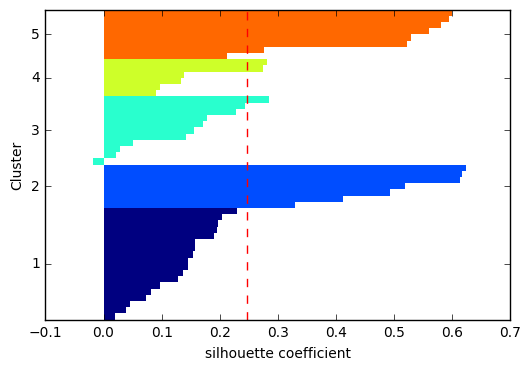

In [52]:
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
            color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [53]:
km.cluster_centers_

array([[  4.11111111e-01,   4.17864924e-01,   4.39869281e-01,
          1.11111111e-01,  -2.77555756e-17,   6.11111111e-01,
         -6.93889390e-18,   6.11111111e-01,  -6.93889390e-18,
          2.77777778e-01,   2.22222222e-01,   3.88888889e-01,
          1.66666667e-01,   5.55555556e-02,   3.45751634e-01,
          3.45533769e-01,   3.59477124e-01,   3.88888889e-01,
          5.55555556e-02,   1.11111111e-01,  -3.46944695e-18,
          1.66666667e-01,  -5.55111512e-17,   3.33333333e-01,
          2.22222222e-01,   3.88888889e-01,   2.22222222e-01,
         -2.22044605e-16],
       [  6.71148459e-01,   5.78151261e-01,   5.71428571e-01,
          1.42857143e-01,   0.00000000e+00,   8.57142857e-01,
          0.00000000e+00,   8.57142857e-01,   0.00000000e+00,
          7.14285714e-01,   1.42857143e-01,   2.85714286e-01,
          1.38777878e-17,   4.28571429e-01,   3.63025210e-01,
          3.57422969e-01,   3.49579832e-01,   0.00000000e+00,
          2.85714286e-01,   2.85714286e-01,

In [54]:
Xdata = df.loc[:, ["肌R", "肌G", "肌B", "髪R", "髪G", "髪B", "幅比", "輪郭"]]

In [55]:
Xdata["肌R"] /= 255
Xdata["肌G"] /= 255
Xdata["肌B"] /= 255

In [56]:
Xdata["髪R"] /= 255
Xdata["髪G"] /= 255
Xdata["髪B"] /= 255

In [57]:
Xdata["輪郭"] = Xdata["輪郭"].replace("b'triangle'", 0) \
                                              .replace("b'square'", 1)\
                                              .replace("b'circle'", 2)

In [58]:
# 訓練データ(ファッションモデルの身体特徴)
X = Xdata.as_matrix().astype(np.float32)

In [59]:
X.shape

(50, 8)

In [60]:
# 教師データ(1-hot)
n_Y = len(y_km)
Y = np.zeros((n_Y, n_clusters)).astype(np.float32)
Y[np.arange(n_Y), y_km] = 1
Y.shape

(50, 5)

In [61]:
import chainer
from chainer import Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

In [68]:
class PBLModel(Chain):
    def __init__(self):
        super(PBLModel, self).__init__(
            l1=L.Linear(8,10),
            l2=L.Linear(10,5),
        )
    def __call__(self, x, y):
        return F.mean_squared_error(self.fwd(x), y)
    def fwd(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = self.l2(h1)
        return h2

In [69]:
model = PBLModel()
optimizer = optimizers.SGD()
optimizer.setup(model)

In [70]:
# モデルの訓練
for i in range(10000):
    x = Variable(X)
    y = Variable(Y)
    model.zerograds()
    loss = model(x, y)
    loss.backward()
    optimizer.update()

In [74]:
# モデルのテスト
xt = Variable(X, volatile='on')
yt = model.fwd(xt)
ans = yt.data
yans = Y.nonzero()[1]
nrow, ncol = ans.shape
ok = 0
for i in range(nrow):
    cls = np.argmax(ans[i, :])
    if cls == yans[i]:
        ok += 1

print(ok, "/", nrow, " = ", (ok * 1.0)/nrow)

30 / 50  =  0.6


In [62]:
class PBLLogi(Chain):
    def __init__(self):
        super(PBLLogi, self).__init__(
            l1=L.Linear(8,5),
        )
    
    def __call__(self, x, y):
        return F.mean_squared_error(self.fwd(x), y)
    
    def fwd(self, x):
        return F.softmax(self.l1(x))

In [72]:
model = PBLLogi()
optimizer = optimizers.Adam()
optimizer.setup(model)

In [73]:
# モデルの訓練
for i in range(10000):
    x = Variable(X)
    y = Variable(Y)
    model.zerograds()
    loss = model(x, y)
    loss.backward()
    optimizer.update()

In [75]:
myf = Variable(np.array([[192/255, 150/255, 155/255, 58/255, 62/255, 77/255, 2.11, 0]]).astype(np.float32), volatile='on')
ymy = model.fwd(myf)
ans = ymy.data

In [76]:
np.argmax(ans[0, :])

0

In [32]:
192/255

0.7529411764705882

In [77]:
serializers.save_hdf5('pbllogi.model', model)
serializers.save_hdf5('pbllogi.state', optimizer)

In [78]:
cluster_data = df.loc[:, ["画像"]]

In [79]:
cluster_data["クラスタ"] = y_km

In [80]:
cluster_data.to_csv("model_cluster.csv", index=False)
cluster_data

,画像,クラスタ
0,000000004.jpg,2
1,000000008.jpg,2
2,000000009.jpg,3
3,000000012.jpg,1
4,000000013.jpg,0
5,000000014.jpg,0
6,000000015.jpg,0
7,000000024.jpg,3
8,000000025.jpg,0
9,000000027.jpg,2


In [81]:
cluster_centroids = pd.DataFrame(km.cluster_centers_,
                                 columns=['iR', 'iG', 'iB', 'i目詰', 'i目粗', 'i薄', 'i厚', 'i軽', 'i重', 'i柔', 'i堅',
       'iツル', 'iザラ', 'i模様', 'bR', 'bG', 'bB', 'b目詰', 'b目粗', 'b薄', 'b厚', 'b軽',
       'b重', 'b柔', 'b堅', 'bツル', 'bザラ', 'b模様'])

In [82]:
cluster_centroids.to_csv("centroids.csv", index=False)
cluster_centroids

,iR,iG,iB,i目詰,i目粗,i薄,i厚,i軽,i重,i柔,...,b目粗,b薄,b厚,b軽,b重,b柔,b堅,bツル,bザラ,b模様
0,0.411111,0.417865,0.439869,0.111111,-2.775558e-17,0.611111,-6.938894e-18,0.611111,-6.938894e-18,0.277778,...,5.555556e-02,0.111111,-3.469447e-18,0.166667,-5.551115e-17,0.333333,0.222222,0.388889,0.222222,-2.220446e-16
1,0.671148,0.578151,0.571429,0.142857,0.000000e+00,0.857143,0.000000e+00,0.857143,0.000000e+00,0.714286,...,2.857143e-01,0.285714,0.000000e+00,0.571429,0.000000e+00,0.428571,0.000000,0.142857,0.714286,5.714286e+00
2,0.546524,0.510517,0.519073,0.090909,1.818182e-01,0.454545,1.818182e-01,0.454545,9.090909e-02,0.636364,...,-1.387779e-17,0.181818,9.090909e-02,0.272727,9.090909e-02,0.181818,0.272727,0.090909,0.363636,1.110223e-16
3,0.416993,0.377124,0.369281,0.166667,1.666667e-01,0.666667,0.000000e+00,0.666667,0.000000e+00,0.333333,...,0.000000e+00,0.166667,0.000000e+00,0.333333,0.000000e+00,0.333333,0.166667,0.500000,0.000000,1.110223e-16
4,0.237745,0.295098,0.369118,1.000000,0.000000e+00,1.000000,0.000000e+00,0.875000,1.250000e-01,1.000000,...,0.000000e+00,1.000000,0.000000e+00,0.375000,7.500000e-01,0.250000,0.750000,1.000000,0.000000,1.110223e-16
